In [1]:
!wget https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv

--2021-11-13 14:01:32--  https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62333 (61K) [text/plain]
Saving to: ‘nigerian-songs.csv’

nigerian-songs.csv  100%[===================>]  60.87K  --.-KB/s    in 0.001s  

2021-11-13 14:01:32 (45.3 MB/s) - ‘nigerian-songs.csv’ saved [62333/62333]



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [4]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [5]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Text(0.5, 1.0, 'Top genres')

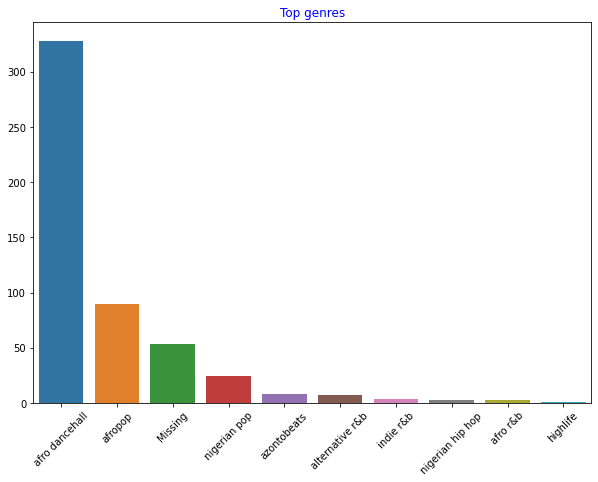

In [6]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:10].index,y=top[:10].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

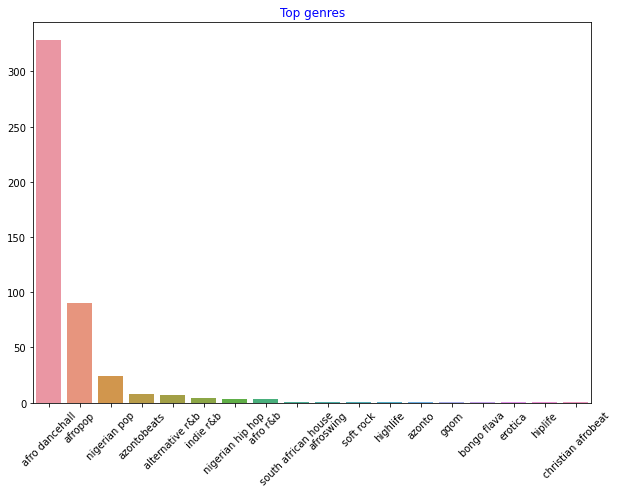

In [7]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

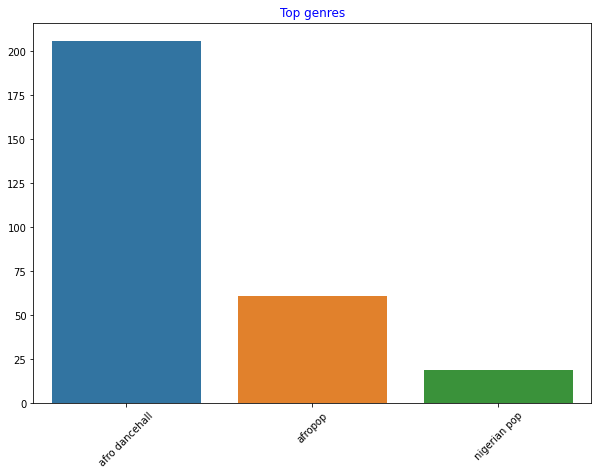

In [8]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

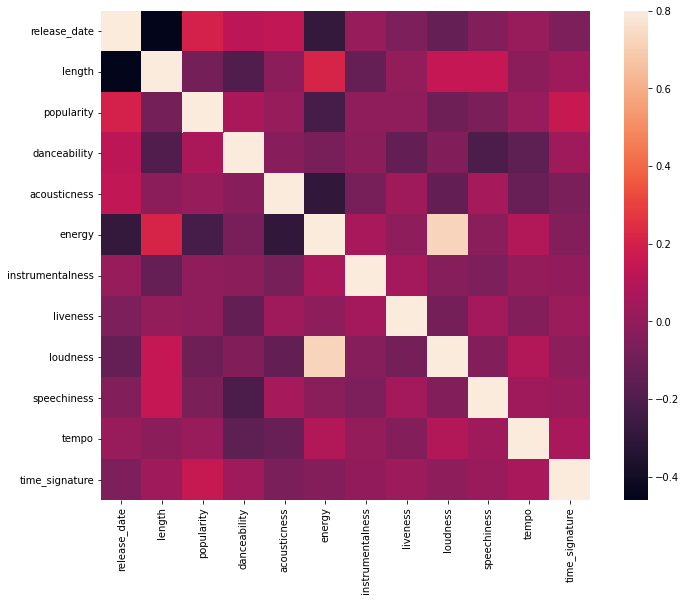

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

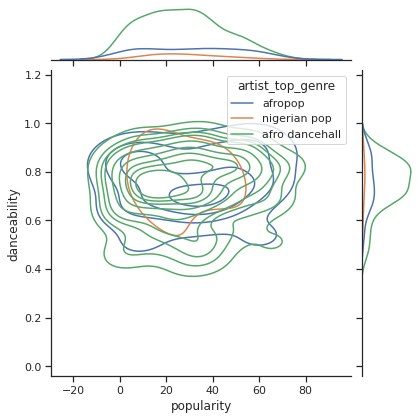

In [10]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


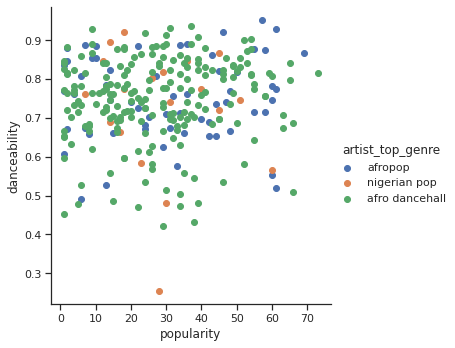

In [11]:
sns.FacetGrid(df, hue="artist_top_genre", size=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

Exercise: Do some more visualizations

In [18]:
numeric_cols = [num_col for num_col in list(df.columns) if df[num_col].dtype != 'object' ]
df[numeric_cols].dtypes

release_date          int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [20]:
len(numeric_cols)

12

In [28]:
#The following function takes in a numpy array and returns its indices
def get_indicies(array):
  indices = []
  for row in range(axes.shape[0]):
    for column in range(axes.shape[1]):
      indices.append((row,column))
  return(indices)    

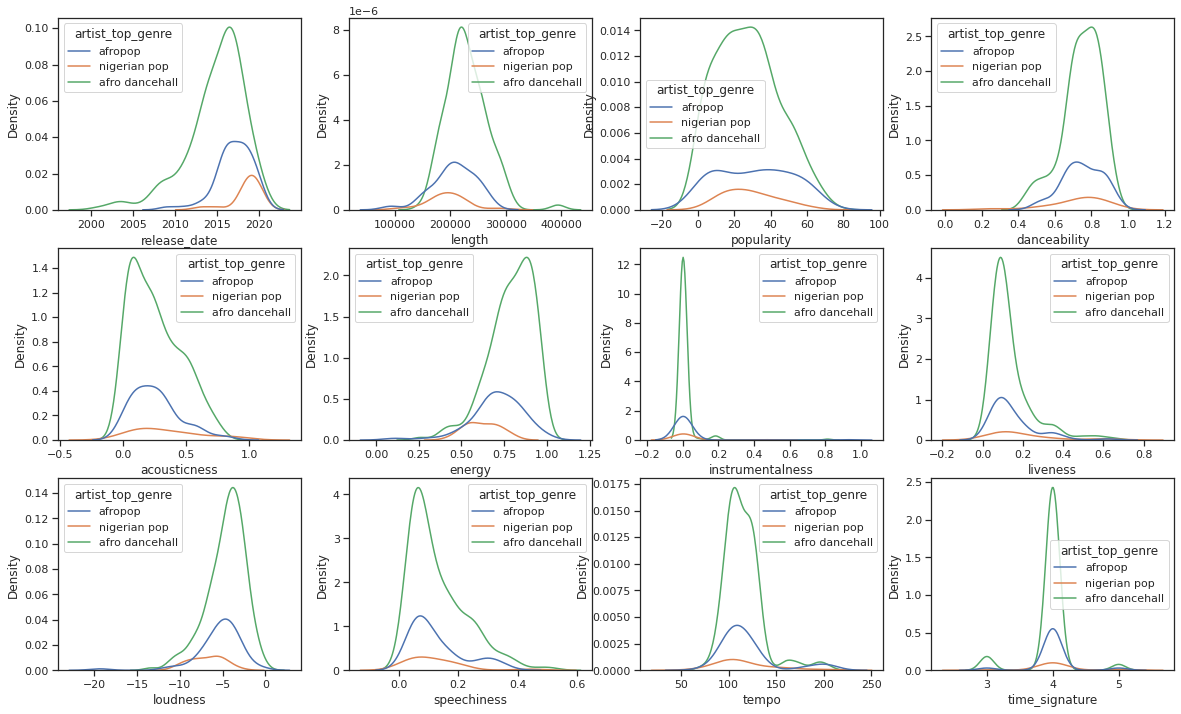

In [30]:
_, axes =  plt.subplots(3,4,figsize=(20,12))
indices = get_indicies(axes)
for feature, index in zip(numeric_cols, indices):
  sns.kdeplot(x=feature, data=df, ax= axes[index],hue = 'artist_top_genre')

Regardless of the genre there isn't an obvious shift in d distribution of the features i.e they don't seem to be any clusters in d dataset

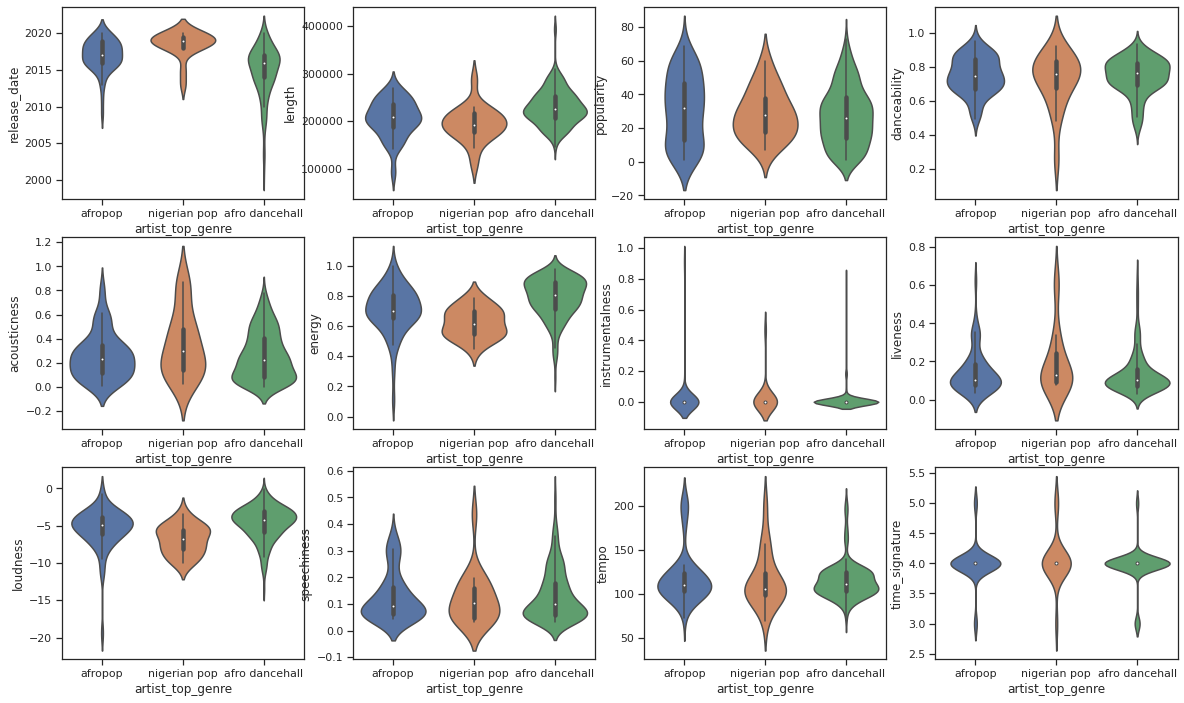

In [34]:
#use violin plot to see distributions of all features in respect to artist genre
_, axes =  plt.subplots(3,4,figsize=(20,12))
indices = get_indicies(axes)
for feature, index in zip(numeric_cols, indices):
  sns.violinplot(x ='artist_top_genre' ,y=feature, data=df, ax= axes[index])

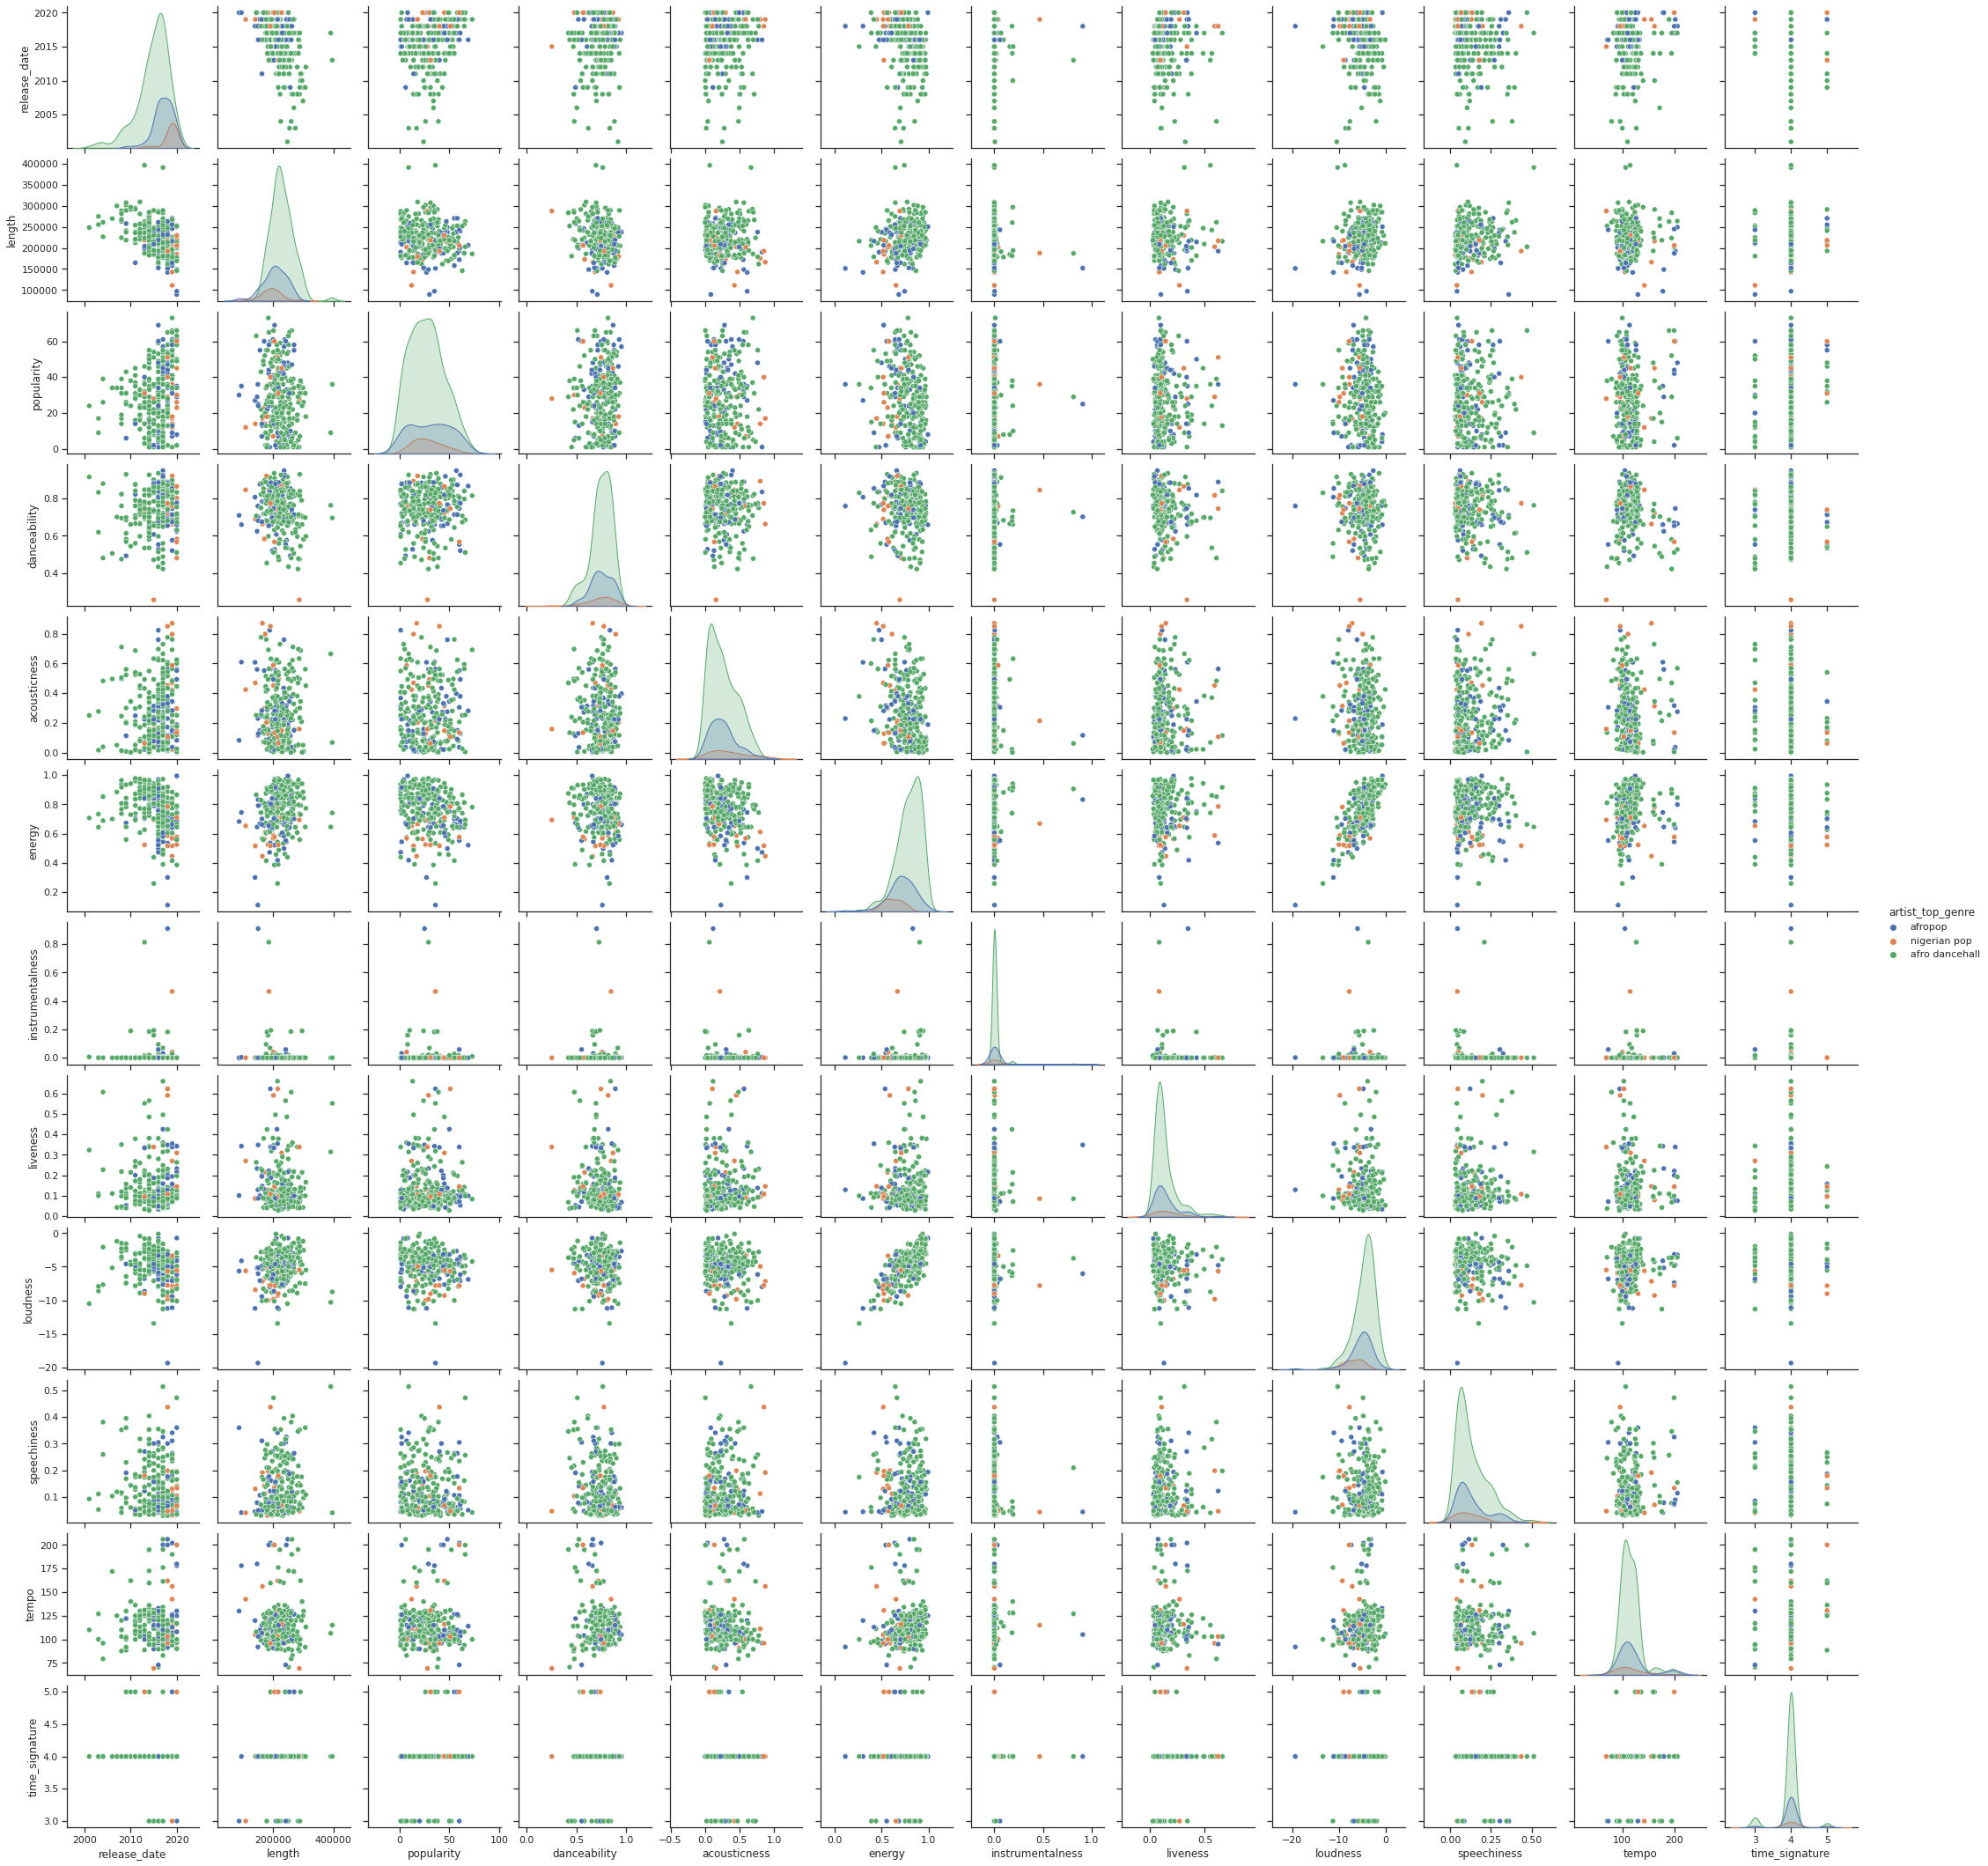

In [35]:
#a pairplot can clear all doubts and help see if there are clusters at all
sns.pairplot(df, hue="artist_top_genre")